# Gradient Boosting Algorithm - Outline
For \( $t = 1 \dots T$ \):

- Construct \( $d_t$ \), where \( $d_t$ \) is a discrete probability distribution over indices $\{1 \dots n \}$.
- Run \( $A$ \) on \( $d_t$ \), producing \( $h_{(t)} : \mathcal{X} \to \{-1,1\} $\).
- Calculate:

$$
\epsilon_t = \text{error}_{d_t}(h_{(t)}) = \Pr_{i \sim d_t}[h_{(t)}(x_i) \neq y_i]
$$

$$
= \frac{1}{2} - \gamma_t
$$

where by the weak learning assumption,

$$
\gamma_t > \gamma_{WLA}.
$$

**End.**

Output \( $H$\).


Where: 
- $A$ is a weak learning algorithm
- $H$ ensemble of multiple weak learning algorithm

## Implementation using xgboost

In [57]:
import xgboost as xgb # pip install xgboost
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [59]:
# Prepare data
X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Convert to DMatrix (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [65]:
# Set parameters
params = {
    'objective': 'reg:squarederror',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)


In [67]:
# Make predictions
y_pred = model.predict(dtest)


In [73]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 34.3469


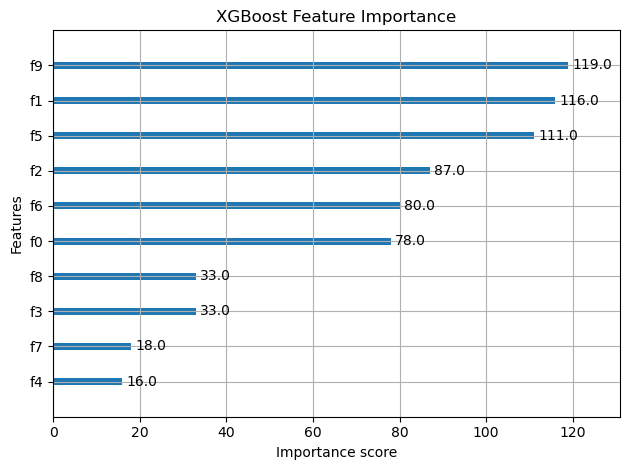

In [71]:
# Feature importance visualization
xgb.plot_importance(model, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()